**<center><font size=6 color=red>ML Validation</font>**



# Data preprocessing
## Download Data

In [1]:
# Import libraries commonly used for data analysis
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# Ignore the warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Features to be used
columns  = ['COL1A1', 'LUM',  'label']

features = ['COL1A1','LUM']

In [3]:
# Load training set
train = pd.read_csv('train_9_gene_Matrix.csv',index_col=0)
train = train[columns]
train.head(2)

,COL1A1,LUM,label
GSM824327,6.521395,4.553093,0
GSM824328,6.703905,4.748792,0


In [4]:
# Load test set
test = pd.read_csv('GSE658019_9_test_Matrix.csv',index_col=0)
test = test[columns]
test.head(2)

,COL1A1,LUM,label
GSM1606492,12.885432,12.000701,0
GSM1606493,14.128399,11.279333,1


## Data standardization

In [5]:
# Import standardized methods
from sklearn.preprocessing import StandardScaler
from sklearn_pandas import DataFrameMapper

In [6]:
# Define the transformation method
x_mapper = DataFrameMapper([
    (features,[StandardScaler()]),
], df_out=False)

In [7]:
# Training set data standardization
train_X = train[features]
train_X = x_mapper.fit_transform(train_X.copy())
# Extract tags
train_y = train['label']

In [8]:
# Test set data standardization
test_X = test[features]
test_X = x_mapper.fit_transform(test_X.copy())
# Extract tags
test_y = test['label']

# Build model

In [9]:
# Import the required machine learning algorithm model
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

# Import model evaluation function
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, plot_roc_curve, roc_curve, precision_score, recall_score


In [10]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

# Define grid search hyperparameter function
def grid_search_cv(clf, params):
    # Set ten times ten-fold cross-validation parameters
    cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=10,random_state=0)
    # Instantiate the searcher
    grid = GridSearchCV(estimator=clf, param_grid=params, cv=cv, refit=callable ,scoring=['accuracy','recall','precision','f1'])
    # Search for hyperparameters
    grid.fit(train_X, train_y)  
    return pd.DataFrame(grid.cv_results_)[['params','mean_test_accuracy','mean_test_recall','mean_test_precision','mean_test_f1']]

In [11]:
# Draw model tuning effect diagram
def model_result(result,size=8):
    plt.figure(figsize=(size,size-2))
    x =  result.index
    y1 = result['mean_test_accuracy']   
    y2 = result['mean_test_recall']     
    y3 = result['mean_test_precision']  
    y4 = result['mean_test_f1']

    plt.plot(x, y1)
    plt.scatter(y1.argmax(), y1.max(),label= 'mean_test_accuracy' + str(result['params'][y1.argmax()]))  
    print('mean_test_accuracy  best_params:',result['params'][y1.argmax()]) 
    
    plt.plot(x, y2)
    plt.scatter(y2.argmax(), y2.max(),label='mean_test_recall' + str(result['params'][y2.argmax()]))  
    print('mean_test_recall    best_params:',result['params'][y2.argmax()])  
    
    plt.plot(x, y3)
    plt.scatter(y3.argmax(), y3.max(),label='mean_test_precision' + str(result['params'][y3.argmax()]))  
    print('mean_test_precision best_params:',result['params'][y3.argmax()]) 
    
    plt.plot(x, y4)
    plt.scatter(y4.argmax(), y4.max(),label='mean_test_f1' + str(result['params'][y4.argmax()]))  
    print('mean_test_f1        best_params:',result['params'][y4.argmax()]) 

    plt.xlabel('params_index')
    plt.legend(loc="lower right")
    plt.show()

## SVC model searches for optimal hyperparameters

In [12]:
svm = SVC(kernel='linear',probability= True)
param_grid = {
    'C':[i/10 for i in range(1,30)], 
    }

svm_result = grid_search_cv(svm, param_grid)
svm_result

,params,mean_test_accuracy,mean_test_recall,mean_test_precision,mean_test_f1
0,{'C': 0.1},0.765000,0.68125,0.829880,0.737880
1,{'C': 0.2},0.771875,0.69125,0.836887,0.747150
2,{'C': 0.3},0.773750,0.70375,0.830975,0.752681
3,{'C': 0.4},0.775000,0.70750,0.828348,0.754299
4,{'C': 0.5},0.775625,0.71125,0.826903,0.756048
5,{'C': 0.6},0.775000,0.71000,0.827006,0.754754
6,{'C': 0.7},0.773750,0.71125,0.823173,0.754203
7,{'C': 0.8},0.775000,0.71250,0.825173,0.755742
8,{'C': 0.9},0.775000,0.71625,0.823094,0.756955
9,{'C': 1.0},0.774375,0.71500,0.822411,0.756112


mean_test_accuracy  best_params: {'C': 2.5}
mean_test_recall    best_params: {'C': 2.7}
mean_test_precision best_params: {'C': 0.2}
mean_test_f1        best_params: {'C': 2.5}


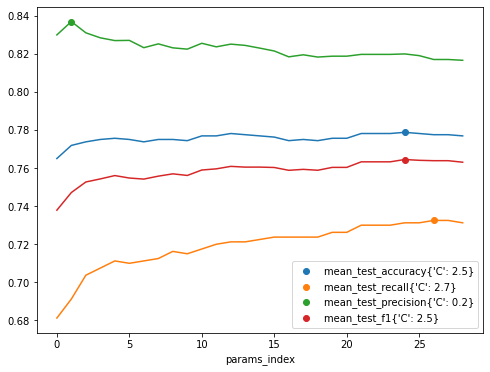

In [13]:
model_result(svm_result,size=8)

In [14]:
# Set the optimal parameter model
SVC(C= 2.5, probability= True)

SVC(C=2.5, probability=True)

## Logistic regression model search for optimal hyperparameters

In [15]:
lr = LogisticRegression(class_weight='balanced')

param_grid = {
              'C':[i/10 for i in range(1,50)],
}

lr_result = grid_search_cv(lr, param_grid)
lr_result

,params,mean_test_accuracy,mean_test_recall,mean_test_precision,mean_test_f1
0,{'C': 0.1},0.734375,0.72500,0.750634,0.728677
1,{'C': 0.2},0.727500,0.71875,0.744890,0.722561
2,{'C': 0.3},0.733125,0.71500,0.758234,0.725672
3,{'C': 0.4},0.735625,0.71500,0.764413,0.727367
4,{'C': 0.5},0.743750,0.72000,0.773058,0.734784
5,{'C': 0.6},0.746250,0.72250,0.777892,0.738278
6,{'C': 0.7},0.746250,0.72250,0.777602,0.738225
7,{'C': 0.8},0.746250,0.72250,0.777039,0.738094
8,{'C': 0.9},0.746250,0.72250,0.775869,0.737800
9,{'C': 1.0},0.747500,0.72250,0.777082,0.738543


mean_test_accuracy  best_params: {'C': 2.7}
mean_test_recall    best_params: {'C': 0.1}
mean_test_precision best_params: {'C': 2.9}
mean_test_f1        best_params: {'C': 3.6}


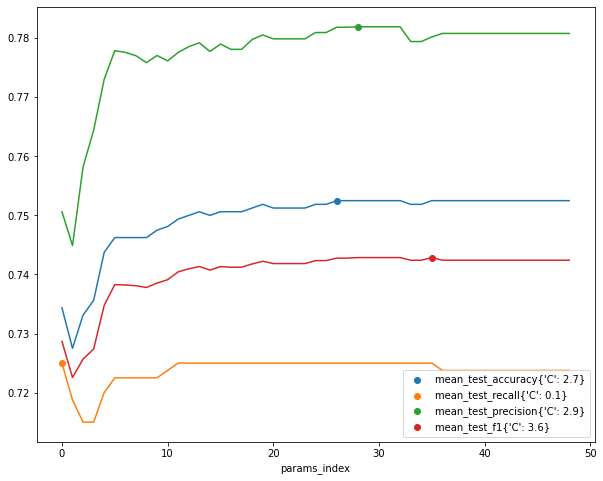

In [16]:
model_result(lr_result,size=10)

In [17]:
# Set the optimal parameter model
LogisticRegression(C= 2.7, class_weight= 'balanced')

LogisticRegression(C=2.7, class_weight='balanced')

## Decision tree model to search for optimal hyperparameters

In [18]:
dt = DecisionTreeClassifier(class_weight='balanced')

param_grid = {
              'criterion':['gini','entropy'], 
              'max_depth':[1,2,3,4,5,6,7,8]
             }


dt_result = grid_search_cv(dt, param_grid)
dt_result

,params,mean_test_accuracy,mean_test_recall,mean_test_precision,mean_test_f1
0,"{'criterion': 'gini', 'max_depth': 1}",0.764375,0.60000,0.906071,0.705450
1,"{'criterion': 'gini', 'max_depth': 2}",0.761875,0.59500,0.904484,0.701637
2,"{'criterion': 'gini', 'max_depth': 3}",0.735000,0.68125,0.799108,0.712591
3,"{'criterion': 'gini', 'max_depth': 4}",0.727500,0.67625,0.768144,0.706858
4,"{'criterion': 'gini', 'max_depth': 5}",0.736250,0.69250,0.780243,0.722260
5,"{'criterion': 'gini', 'max_depth': 6}",0.736250,0.72500,0.758137,0.730030
6,"{'criterion': 'gini', 'max_depth': 7}",0.727500,0.73000,0.739089,0.725142
7,"{'criterion': 'gini', 'max_depth': 8}",0.723750,0.74375,0.729339,0.726736
8,"{'criterion': 'entropy', 'max_depth': 1}",0.743125,0.53875,0.920802,0.662287
9,"{'criterion': 'entropy', 'max_depth': 2}",0.743125,0.53875,0.920802,0.662287


mean_test_accuracy  best_params: {'criterion': 'gini', 'max_depth': 1}
mean_test_recall    best_params: {'criterion': 'gini', 'max_depth': 8}
mean_test_precision best_params: {'criterion': 'entropy', 'max_depth': 1}
mean_test_f1        best_params: {'criterion': 'gini', 'max_depth': 6}


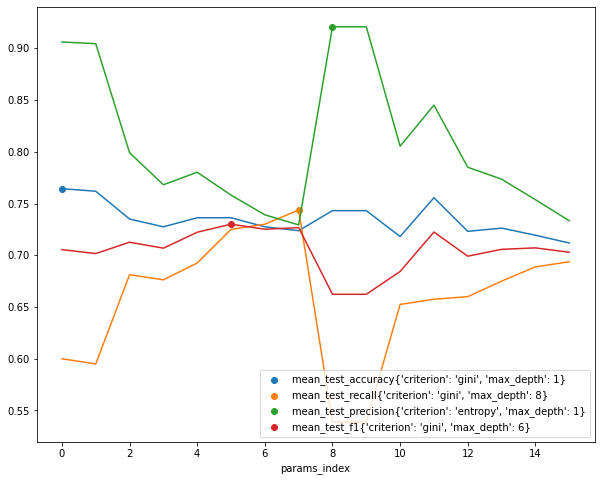

In [19]:
model_result(dt_result,size=10)

In [20]:
# Set the optimal parameter model
DecisionTreeClassifier(class_weight= 'balanced', criterion= 'gini', max_depth= 8)

DecisionTreeClassifier(class_weight='balanced', max_depth=8)

## MLP model search for optimal hyperparameters

In [21]:
mlp = MLPClassifier()

param_grid = {
    'alpha': [1e-5,1e-4,1e-3,1e-2,1e-1],
}

mlp_result = grid_search_cv(mlp, param_grid)
mlp_result

,params,mean_test_accuracy,mean_test_recall,mean_test_precision,mean_test_f1
0,{'alpha': 1e-05},0.760000,0.72750,0.790300,0.749064
1,{'alpha': 0.0001},0.755625,0.72375,0.784771,0.743877
2,{'alpha': 0.001},0.761875,0.73000,0.793157,0.750834
3,{'alpha': 0.01},0.760000,0.72875,0.789532,0.749144
4,{'alpha': 0.1},0.758750,0.72750,0.788580,0.747795


mean_test_accuracy  best_params: {'alpha': 0.001}
mean_test_recall    best_params: {'alpha': 0.001}
mean_test_precision best_params: {'alpha': 0.001}
mean_test_f1        best_params: {'alpha': 0.001}


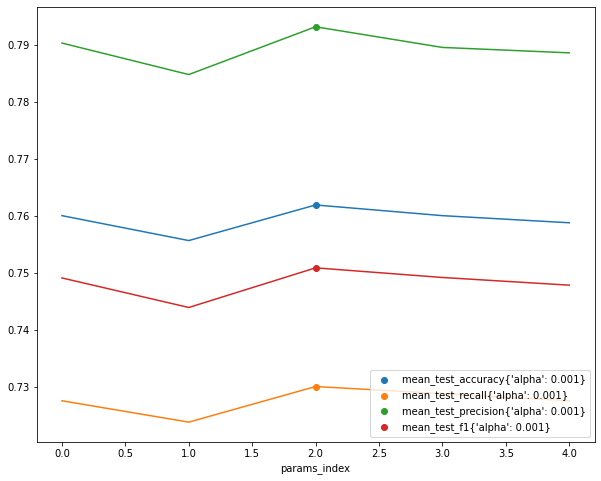

In [22]:
model_result(mlp_result,size=10)

In [33]:
# Set the optimal parameter model
MLPClassifier(alpha=0.001)

MLPClassifier(alpha=0.001)

## XGBoost model search for optimal hyperparameters

In [24]:
xgb = XGBClassifier()

param_grid = { 
#               'gamma':[i/10.0 for i in range(0,20)],
              'gamma':[0.2],   
#                 'learning_rate':[5,1,0.1,0.01,0.001],
               'learning_rate':[1],   
#               'max_depth':range(1,15,1), 
              'max_depth':[6],     
#                'min_child_weight':range(1,20,1),
              'min_child_weight':[12],
               'subsample':[i/10.0 for i in range(6,10)], 
#                'subsample':[0.9], 
             }

xgb_result = grid_search_cv(xgb, param_grid)
xgb_result

,params,mean_test_accuracy,mean_test_recall,mean_test_precision,mean_test_f1
0,"{'gamma': 0.2, 'learning_rate': 1, 'max_depth'...",0.736250,0.70125,0.769301,0.722940
1,"{'gamma': 0.2, 'learning_rate': 1, 'max_depth'...",0.763750,0.66500,0.843709,0.731111
2,"{'gamma': 0.2, 'learning_rate': 1, 'max_depth'...",0.764375,0.65250,0.856372,0.727119
3,"{'gamma': 0.2, 'learning_rate': 1, 'max_depth'...",0.774375,0.64000,0.886824,0.730348


mean_test_accuracy  best_params: {'gamma': 0.2, 'learning_rate': 1, 'max_depth': 6, 'min_child_weight': 12, 'subsample': 0.9}
mean_test_recall    best_params: {'gamma': 0.2, 'learning_rate': 1, 'max_depth': 6, 'min_child_weight': 12, 'subsample': 0.6}
mean_test_precision best_params: {'gamma': 0.2, 'learning_rate': 1, 'max_depth': 6, 'min_child_weight': 12, 'subsample': 0.9}
mean_test_f1        best_params: {'gamma': 0.2, 'learning_rate': 1, 'max_depth': 6, 'min_child_weight': 12, 'subsample': 0.7}


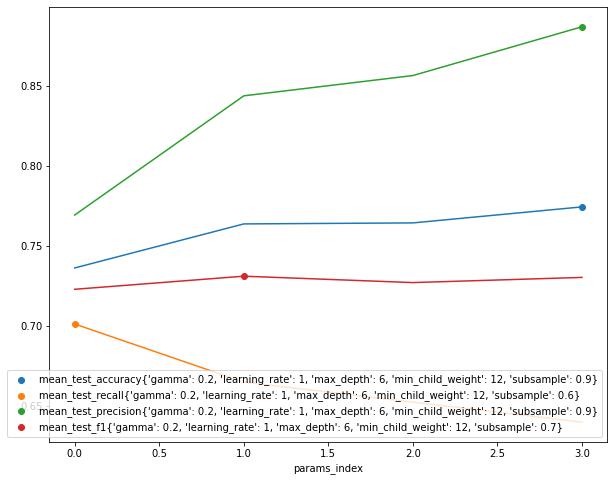

In [25]:
model_result(xgb_result,size=10)

In [26]:
# Set the optimal parameter model
XGBClassifier(gamma= 0.2, learning_rate= 1, max_depth= 6, min_child_weight= 12, subsample= 0.9)

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=0.2,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=1, max_delta_step=None, max_depth=6,
              min_child_weight=12, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=0.9, tree_method=None,
              validate_parameters=None, verbosity=None)

# Compare model effects

In [22]:
# specificity
def get_tnr(y, y_hat): 
    true_negative = sum(1 - (yi or yi_hat) for yi, yi_hat in zip(y, y_hat)) 
    actual_negative = len(y) - sum(y) 
    return true_negative / actual_negative 


# import
def get_cnf(y_true, y_pred):    
    from sklearn.metrics import confusion_matrix
    cnf = confusion_matrix(y_true, y_pred)
    # rename
    TN,FP,FN,TP = cnf[0,0],cnf[0,1],cnf[1,0],cnf[1,1] 
    return (TN,FP,FN,TP)

In [23]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
import joblib  
from sklearn.metrics import confusion_matrix, plot_roc_curve, roc_curve, precision_score, recall_score,f1_score

kf = KFold(n_splits=10,shuffle=True,random_state=0)  # Set up ten-fold cross-validation


X = train_X  # Get the value of X,y
y = train_y

# Model lists
model_list=[
            SVC(C= 2.5, probability= True),
            LogisticRegression(C= 2.7, class_weight= 'balanced'),
            DecisionTreeClassifier(class_weight= 'balanced', criterion= 'gini', max_depth= 8),
            MLPClassifier(alpha= 0.001),
            XGBClassifier(gamma= 0.2, learning_rate= 1, max_depth= 6, min_child_weight= 12, subsample= 0.9),
           ]

model_names=['SVM','LR','DT','MLP','XGBoost']

train_result = [['model_name', 'max_accuracy' ,'max_precision', 'max_recall', 'max_f1_score','specificity','TN,FP,FN,TP','fpr','tpr','auc']]
test_result  = [['model_name', 'accuracy'     ,'precision',     'recall',     'f1_score',    'specificity','TN,FP,FN,TP','fpr','tpr','auc']]

for i,clf in enumerate(model_list):
    max_accuracy = 0
    max_precision = 0
    name = model_names[i]
    print('\n\n', name)
    
    for k in range(10):
        for train_index,validate_index in kf.split(X,y):
            X_t, y_t = X[train_index], y[train_index] 
            X_v, y_v = X[validate_index], y[validate_index]  
            clf.fit(X_t, y_t) 
            y_pred = clf.predict(X_v) 
            accuracy = clf.score(X_v ,y_v) 
            precision = precision_score(y_v, y_pred) 
            recall = recall_score(y_v, y_pred) 
            f1 = f1_score(y_v, y_pred)
            specificity = get_tnr(y_v, y_pred)
            cnf = get_cnf(y_v, y_pred)
            
            y_score = clf.predict_proba(X_v)[:, 1]  
            fpr, tpr, thresholds = roc_curve(y_v, y_score)
            auc = metrics.auc(fpr, tpr) 

            print('Train Accuracy:{:.4f} \t precision:{:.4f} \t recall:{:.4f} \t f1_score:{:.4f}'.format(accuracy,precision, recall, f1))

            if accuracy > max_accuracy:
                max_accuracy = accuracy
                max_precision = precision
                print('****Max   Accuracy:{:.4f} \t precision:{:.4f} \t recall:{:.4f} \t f1_score:{:.4f} '.format(max_accuracy, max_precision, recall, f1))
                
                # save the train reaults
                if i+1 == len(train_result):
                    train_result.append([name, accuracy, precision, recall, f1, specificity, cnf, fpr,tpr,auc])
                else:
                    train_result[i+1] = [name, accuracy, precision, recall, f1, specificity, cnf, fpr,tpr,auc]

                #  save the best model
                filename = './model2/'+ name + '.model'
                joblib.dump(filename=filename,value=clf)
                # load the best model
                best_model = joblib.load(filename=filename)
                
                # test
                y_pred=best_model.predict(test_X) 
                accuracy = best_model.score(test_X, test_y) 
                precision = precision_score(test_y, y_pred) 
                recall = recall_score(test_y, y_pred) 
                f1 = f1_score(test_y, y_pred)
                specificity = get_tnr(test_y, y_pred)
                cnf = get_cnf(test_y, y_pred)
                y_score = clf.predict_proba(test_X)[:, 1]  
                fpr, tpr, thresholds = roc_curve(test_y, y_score)
                auc = metrics.auc(fpr, tpr) 
                
                print('____Test  Accuracy:{:.4f} \t precision:{:.4f} \t recall:{:.4f} \t f1_score:{:.4f}'.format(accuracy,precision, recall, f1))
                
                # save the test results
                if i+1 == len(test_result):
                    test_result.append([name, accuracy, precision, recall, f1, specificity, cnf,fpr,tpr,auc])
                else:
                    test_result[i+1] = [name, accuracy, precision, recall, f1, specificity, cnf,fpr,tpr,auc]

            elif accuracy == max_accuracy:
                if  precision > max_precision:
                    max_precision = precision
                    print('****Max   Accuracy:{:.4f} \t precision:{:.4f} \t recall:{:.4f} \t f1_score:{:.4f} '.format(max_accuracy, max_precision, recall, f1))
                    
                    # save the train result
                    if i+1 == len(train_result):
                        train_result.append([name, accuracy, precision, recall, f1, specificity, cnf, fpr,tpr,auc])
                    else:
                        train_result[i+1] = [name, accuracy, precision, recall, f1, specificity, cnf, fpr,tpr,auc]
                        
                    #save model
                    filename='./model2/'+ name + '.model'
                    joblib.dump(filename=filename,value=clf)
                    #load the best model
                    best_model = joblib.load(filename=filename)
                    
                    # test
                    y_pred=best_model.predict(test_X) 
                    accuracy = best_model.score(test_X, test_y) 
                    precision = precision_score(test_y, y_pred) 
                    recall = recall_score(test_y, y_pred) 
                    f1 = f1_score(test_y, y_pred)
                    specificity = get_tnr(test_y, y_pred)
                    cnf = get_cnf(test_y, y_pred)
                    y_score = clf.predict_proba(test_X)[:, 1]  
                    fpr, tpr, thresholds = roc_curve(test_y, y_score)
                    auc = metrics.auc(fpr, tpr) 
                    print('____Test  Accuracy:{:.4f} \t precision:{:.4f} \t recall:{:.4f} \t f1_score:{:.4f}'.format(accuracy,precision, recall, f1))
                     
                    # save test result
                    if i+1 == len(test_result):
                        test_result.append([name, accuracy, precision, recall, f1, specificity, cnf, fpr,tpr,auc])
                    else:
                        test_result[i+1] = [name, accuracy, precision, recall, f1, specificity, cnf, fpr,tpr,auc]



 SVM
Train Accuracy:0.7500 	 precision:0.7000 	 recall:0.8750 	 f1_score:0.7778
****Max   Accuracy:0.7500 	 precision:0.7000 	 recall:0.8750 	 f1_score:0.7778 
____Test  Accuracy:0.8125 	 precision:0.8333 	 recall:0.7812 	 f1_score:0.8065
Train Accuracy:0.7500 	 precision:0.8333 	 recall:0.6250 	 f1_score:0.7143
****Max   Accuracy:0.7500 	 precision:0.8333 	 recall:0.6250 	 f1_score:0.7143 
____Test  Accuracy:0.7969 	 precision:0.8276 	 recall:0.7500 	 f1_score:0.7869
Train Accuracy:0.7500 	 precision:0.7143 	 recall:0.7143 	 f1_score:0.7143
Train Accuracy:0.6875 	 precision:0.6667 	 recall:0.5714 	 f1_score:0.6154
Train Accuracy:0.8125 	 precision:0.8750 	 recall:0.7778 	 f1_score:0.8235
****Max   Accuracy:0.8125 	 precision:0.8750 	 recall:0.7778 	 f1_score:0.8235 
____Test  Accuracy:0.8125 	 precision:0.8571 	 recall:0.7500 	 f1_score:0.8000
Train Accuracy:0.9375 	 precision:0.8889 	 recall:1.0000 	 f1_score:0.9412
****Max   Accuracy:0.9375 	 precision:0.8889 	 recall:1.0000 	 f1_

Train Accuracy:0.8125 	 precision:0.7500 	 recall:0.6000 	 f1_score:0.6667
Train Accuracy:0.6250 	 precision:0.7143 	 recall:0.5556 	 f1_score:0.6250
Train Accuracy:0.8125 	 precision:1.0000 	 recall:0.7500 	 f1_score:0.8571
Train Accuracy:0.7500 	 precision:0.7500 	 recall:0.7500 	 f1_score:0.7500
Train Accuracy:0.7500 	 precision:0.8333 	 recall:0.6250 	 f1_score:0.7143
Train Accuracy:0.7500 	 precision:0.6667 	 recall:0.8571 	 f1_score:0.7500
Train Accuracy:0.6875 	 precision:0.6667 	 recall:0.5714 	 f1_score:0.6154
Train Accuracy:0.7500 	 precision:0.7778 	 recall:0.7778 	 f1_score:0.7778
Train Accuracy:0.9375 	 precision:0.8889 	 recall:1.0000 	 f1_score:0.9412
Train Accuracy:0.6875 	 precision:0.6250 	 recall:0.7143 	 f1_score:0.6667
Train Accuracy:0.8125 	 precision:0.7500 	 recall:0.6000 	 f1_score:0.6667
Train Accuracy:0.6250 	 precision:0.7143 	 recall:0.5556 	 f1_score:0.6250
Train Accuracy:0.8125 	 precision:1.0000 	 recall:0.7500 	 f1_score:0.8571
Train Accuracy:0.7500 	 p

Train Accuracy:0.5625 	 precision:0.5000 	 recall:0.7143 	 f1_score:0.5882
Train Accuracy:0.7500 	 precision:0.6000 	 recall:0.6000 	 f1_score:0.6000
Train Accuracy:0.7500 	 precision:0.7778 	 recall:0.7778 	 f1_score:0.7778
Train Accuracy:0.7500 	 precision:0.9000 	 recall:0.7500 	 f1_score:0.8182
Train Accuracy:0.6875 	 precision:0.6364 	 recall:0.8750 	 f1_score:0.7368
Train Accuracy:0.7500 	 precision:0.7500 	 recall:0.7500 	 f1_score:0.7500
Train Accuracy:0.6250 	 precision:0.6000 	 recall:0.4286 	 f1_score:0.5000
Train Accuracy:0.8125 	 precision:0.8333 	 recall:0.7143 	 f1_score:0.7692
Train Accuracy:0.7500 	 precision:0.7273 	 recall:0.8889 	 f1_score:0.8000
Train Accuracy:0.8750 	 precision:0.8750 	 recall:0.8750 	 f1_score:0.8750
Train Accuracy:0.5625 	 precision:0.5000 	 recall:0.7143 	 f1_score:0.5882
Train Accuracy:0.7500 	 precision:0.6000 	 recall:0.6000 	 f1_score:0.6000
Train Accuracy:0.7500 	 precision:0.7778 	 recall:0.7778 	 f1_score:0.7778
Train Accuracy:0.7500 	 p

Train Accuracy:0.8125 	 precision:1.0000 	 recall:0.7500 	 f1_score:0.8571
Train Accuracy:0.7500 	 precision:0.7000 	 recall:0.8750 	 f1_score:0.7778
Train Accuracy:0.6875 	 precision:0.7143 	 recall:0.6250 	 f1_score:0.6667
Train Accuracy:0.7500 	 precision:0.6667 	 recall:0.8571 	 f1_score:0.7500
Train Accuracy:0.6875 	 precision:0.6667 	 recall:0.5714 	 f1_score:0.6154
Train Accuracy:0.6875 	 precision:0.7000 	 recall:0.7778 	 f1_score:0.7368
Train Accuracy:0.9375 	 precision:0.8889 	 recall:1.0000 	 f1_score:0.9412
Train Accuracy:0.7500 	 precision:0.7143 	 recall:0.7143 	 f1_score:0.7143
Train Accuracy:0.8750 	 precision:1.0000 	 recall:0.6000 	 f1_score:0.7500
Train Accuracy:0.6250 	 precision:0.7143 	 recall:0.5556 	 f1_score:0.6250
Train Accuracy:0.8125 	 precision:1.0000 	 recall:0.7500 	 f1_score:0.8571
Train Accuracy:0.7500 	 precision:0.7000 	 recall:0.8750 	 f1_score:0.7778
Train Accuracy:0.6875 	 precision:0.7143 	 recall:0.6250 	 f1_score:0.6667
Train Accuracy:0.8125 	 p

Train Accuracy:0.8750 	 precision:1.0000 	 recall:0.7500 	 f1_score:0.8571
Train Accuracy:0.7500 	 precision:1.0000 	 recall:0.5000 	 f1_score:0.6667
Train Accuracy:0.6875 	 precision:0.6250 	 recall:0.7143 	 f1_score:0.6667
Train Accuracy:0.7500 	 precision:1.0000 	 recall:0.4286 	 f1_score:0.6000
Train Accuracy:0.8125 	 precision:0.8750 	 recall:0.7778 	 f1_score:0.8235
Train Accuracy:0.9375 	 precision:1.0000 	 recall:0.8750 	 f1_score:0.9333
Train Accuracy:0.7500 	 precision:0.8000 	 recall:0.5714 	 f1_score:0.6667
Train Accuracy:0.8750 	 precision:1.0000 	 recall:0.6000 	 f1_score:0.7500
Train Accuracy:0.5625 	 precision:0.6667 	 recall:0.4444 	 f1_score:0.5333
Train Accuracy:0.7500 	 precision:1.0000 	 recall:0.6667 	 f1_score:0.8000
Train Accuracy:0.8750 	 precision:1.0000 	 recall:0.7500 	 f1_score:0.8571
Train Accuracy:0.7500 	 precision:1.0000 	 recall:0.5000 	 f1_score:0.6667
Train Accuracy:0.6875 	 precision:0.6250 	 recall:0.7143 	 f1_score:0.6667
Train Accuracy:0.7500 	 p

In [24]:
# Draw the ROC diagram of the optimal result
def get_roc(result, picture_name):
    for i in range(len(result)):
        name = result['model_name'][i]
        fpr,tpr,auc = result[['fpr','tpr','auc']].iloc[i]

        # Draw ROC curve
        
        if name == 'XGBoost':
            plt.plot(fpr,tpr,linewidth=2,color='red', alpha=0.9,label=name+'(AUC=%.4f)'%auc)
        else:
            plt.plot(fpr,tpr,linewidth=1,alpha=0.6,label=name+'(AUC=%.4f)'%auc)
    
    plt.xlabel('1-Specificity(False positive rate)')
    plt.ylabel('Sensitivity(True positive rate)')
    # Draw a reference line
    plt.plot([0,1],[0,1],'b--',alpha=1.0)
    #set legend
    plt.legend(loc='lower right')
    # save figure
    file_name = '.\picture\\'+picture_name+'.tif'
    plt.savefig(file_name, dpi=300)
    plt.show()


## Training set effect

In [25]:
train = pd.DataFrame(train_result[1:],columns=train_result[0])
train.iloc[:,[0,1,2,3,4,5,6,9]]
# train

,model_name,max_accuracy,max_precision,max_recall,max_f1_score,specificity,"TN,FP,FN,TP",auc
0,SVM,0.9375,0.888889,1.000,0.941176,0.875,"(7, 1, 0, 8)",0.984375
1,LR,0.9375,0.888889,1.000,0.941176,0.875,"(7, 1, 0, 8)",1.000000
2,DT,0.8750,0.875000,0.875,0.875000,0.875,"(7, 1, 1, 7)",0.914062
3,MLP,0.9375,0.888889,1.000,0.941176,0.875,"(7, 1, 0, 8)",1.000000
4,XGBoost,0.9375,1.000000,0.875,0.933333,1.000,"(8, 0, 1, 7)",0.992188


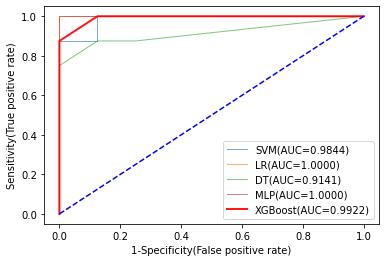

In [26]:
get_roc(train, picture_name='Train_ROC')

## Test set effect

In [27]:
test = pd.DataFrame(test_result[1:],columns=test_result[0])
test.iloc[:,[0,1,2,3,4,5,6,9]]

,model_name,accuracy,precision,recall,f1_score,specificity,"TN,FP,FN,TP",auc
0,SVM,0.812500,0.884615,0.71875,0.793103,0.90625,"(29, 3, 9, 23)",0.871094
1,LR,0.859375,0.848485,0.87500,0.861538,0.84375,"(27, 5, 4, 28)",0.907227
2,DT,0.812500,0.857143,0.75000,0.800000,0.87500,"(28, 4, 8, 24)",0.835938
3,MLP,0.859375,0.848485,0.87500,0.861538,0.84375,"(27, 5, 4, 28)",0.908203
4,XGBoost,0.890625,0.931034,0.84375,0.885246,0.93750,"(30, 2, 5, 27)",0.895508


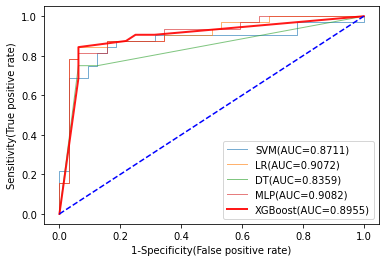

In [28]:
get_roc(test, picture_name='Test_ROC')